In [1]:
# Artifical Neural Network Algorithm To Predict Whether customer will stay or leave the bank based previous customer data.

In [1]:
# Load Csv file
import pandas as pd
dataset=pd.read_csv('Churn_Modelling.csv')

In [2]:
# Descriptive Head of a dataset
print("-------------------- Head-------------------")
print(dataset.head(2))
# Descriptive shape of a dataset
print("--------------------shape------------------")
print(dataset.shape)
# Descriptive datatype of each attribute in dataset
print("------------------- data type---------------")
print(dataset.dtypes)

-------------------- Head-------------------
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
--------------------shape------------------
(10000, 14)
------------------- data type---------------
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float

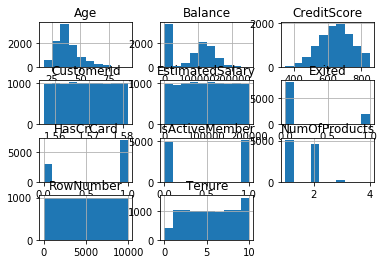

In [4]:
# Visualisation of each attribute To know What kind of distribution it is ?

import matplotlib.pyplot as plt
# Historgram Visualisation
dataset.hist()
plt.show()

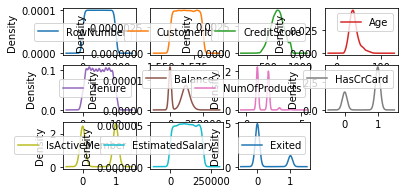

In [10]:
# As per above Histogram Visualisation is not much clear so we are using density plot

# density plot visualisation is used to view smooth shape of each attribute
dataset.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(4,4))
plt.show()

In [11]:
# As per Above visualisation some attributes have gaussian,exponital and some other distributions, so all data is imbalanced
# we need to keep all values in same distribution balanced data then only we able to get good predictions.

In [12]:
# Using linear Algebra concept split the dataset into input and ouput attribute
array=dataset.values
x=array[:,3:-1]
y=array[:,-1]
print("------------------------ X Input Attribute ----------------------")
print(x[:5,:])
print("------------------------ Y Output Attribute ---------------------")
print(y[:5,])

------------------------ X Input Attribute ----------------------
[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]]
------------------------ Y Output Attribute ---------------------
[1 0 1 0 0]


In [13]:
# Label Encoder to encode the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder_1=LabelEncoder()
x[:,1]=labelencoder_1.fit_transform(x[:,1])
labelencoder_2=LabelEncoder()
x[:,2]=labelencoder_2.fit_transform(x[:,2])
print(x[:10,:])

[[619 0 0 42 2 0.0 1 1 1 101348.88]
 [608 2 0 41 1 83807.86 1 0 1 112542.58]
 [502 0 0 42 8 159660.8 3 1 0 113931.57]
 [699 0 0 39 1 0.0 2 0 0 93826.63]
 [850 2 0 43 2 125510.82 1 1 1 79084.1]
 [645 2 1 44 8 113755.78 2 1 0 149756.71]
 [822 0 1 50 7 0.0 2 1 1 10062.8]
 [376 1 0 29 4 115046.74 4 1 0 119346.88]
 [501 0 1 44 4 142051.07 2 0 1 74940.5]
 [684 0 1 27 2 134603.88 1 1 1 71725.73]]


In [14]:
# Country attribute having values like 0,1,2 so it will diffcult to understand for model
# Encoding the numerical value to dummy variable using OneHotEncoder library
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[1])
x=onehotencoder.fit_transform(x).toarray()

C:\Users\arunkumar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\arunkumar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [15]:
print(x[:3,:])

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00
  4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00
  4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00
  4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1393157e+05]]


In [16]:
# Handling dummy variable trap as a statistical formula 
# total dummy variable=1-all dummy varaibles (final_dummy variables=1-3=2)
x=x[:,1:]
print(x[:3,:])

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00 4.2000000e+01
  2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00 4.1000000e+01
  1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00 4.2000000e+01
  8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00 0.0000000e+00
  1.1393157e+05]]


In [17]:
# All Attribute values don't in same scale, Because of this we will get terriable accuracy from model
# So by using Normalization Scale we are rescaling all values

# Normalization Scale
from sklearn.preprocessing import Normalizer
scaled_value=Normalizer()
x=scaled_value.fit_transform(x)
print(x[:4,:])

[[0.00000000e+00 0.00000000e+00 6.10750116e-03 0.00000000e+00
  4.14402340e-04 1.97334448e-05 0.00000000e+00 9.86672238e-06
  9.86672238e-06 9.86672238e-06 9.99981263e-01]
 [0.00000000e+00 7.12652104e-06 4.33292479e-03 0.00000000e+00
  2.92187362e-04 7.12652104e-06 5.97258477e-01 7.12652104e-06
  0.00000000e+00 7.12652104e-06 8.02037064e-01]
 [0.00000000e+00 0.00000000e+00 2.55935218e-03 0.00000000e+00
  2.14129067e-04 4.07864889e-05 8.14000431e-01 1.52949333e-05
  5.09831111e-06 0.00000000e+00 5.80858589e-01]
 [0.00000000e+00 0.00000000e+00 7.44970317e-03 0.00000000e+00
  4.15648675e-04 1.06576583e-05 0.00000000e+00 2.13153166e-05
  0.00000000e+00 0.00000000e+00 9.99972164e-01]]


In [18]:
# Split the dataset into train and test set
train_size=0.80
test_size=0.20
seed=5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

In [19]:
# Artifical Neural Network Algorithm
# intialising the sequence of an artifical neural network
# Using sequence function building sequence of an atrifical neural network
from keras.models import Sequential
ann=Sequential()
nodes=len(x_train[0])
halfnode=int(nodes+1/2)
# Adding first input layer and hidden layer to artifical neurak network
# Using Dense function adding(intalize) input,hidden and ouput layers in sequence manner
from keras.layers import Dense
ann.add(Dense(output_dim=halfnode,input_dim=nodes,activation='relu',init='uniform'))
'''
   As per above parameters.
   ouput_dim= first hidden layer and no.of nodes,
   input_dim= input layer and no.of nodes,
   activation= which activation function we need to use in hidden layers,
   init= uniformly intalising the weights but not 0 for the first time'''

Using TensorFlow backend.


C:\Users\arunkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, activation="relu", units=11, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


'\n   As per above parameters.\n   ouput_dim= first hidden layer and no.of nodes,\n   input_dim= input layer and no.of nodes,\n   activation= which activation function we need to use in hidden layers,\n   init= uniformly intalising the weights but not 0 for the first time'

In [20]:
# adding second and third hidden layers
ann.add(Dense(output_dim=halfnode,init='uniform',activation='relu'))
ann.add(Dense(output_dim=halfnode,init='uniform',activation='relu'))

C:\Users\arunkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
  
C:\Users\arunkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# Adding ouput layer to artifical neural network
ann.add(Dense(output_dim=1,activation='sigmoid',init='uniform'))

C:\Users\arunkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [22]:
# Now Compile artifical neural network intialised model
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
'''optimizer= what kind of optimizer we need to use either gradient or stochastic gradient.we are using best adam algorithm from 
   stochastic gradient algorithm.
   loss= we are using binary because outcome is binary values if we have more class then softmax_crossentropy.
   metrics= we need to make accuracys are working fine.s'''



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


'optimizer= what kind of optimizer we need to use either gradient or stochastic gradient.we are using best adam algorithm from \n   stochastic gradient algorithm.\n   loss= we are using binary because outcome is binary values if we have more class then softmax_crossentropy.\n   metrics= we need to make accuracys are working fine.s'

In [23]:
# Fit out train data to artifical neural network
ann.fit(x_train,y_train,batch_size=20,nb_epoch=200)

C:\Users\arunkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Epoch 1/200





8000/8000 [==============================] - 1s 167us/step - loss: 0.5521 - acc: 0.7948
Epoch 2/200
8000/8000 [==============================] - 0s 62us/step - loss: 0.5049 - acc: 0.7960
Epoch 3/200
8000/8000 [==============================] - 1s 66us/step - loss: 0.5031 - acc: 0.7960
Epoch 4/200
8000/8000 [==============================] - 0s 60us/step - loss: 0.5024 - acc: 0.7960: 0s - loss: 0.5079 - acc: 0
Epoch 5/200
8000/8000 [==============================] - 0s 60us/step - loss: 0.5023 - acc: 0.7960
Epoch 6/200
8000/8000 [==============================] - 0s 62us/step - loss: 0.5020 - acc: 0.7960
Epoch 7/200
8000/8000 [==============================] - 1s 63us/step - loss: 0.5019 - acc: 0.7960
Epoch 8/200
8000/8000 [==============================] - 1s 68us/step - loss: 0.5020 - acc: 0.7960
Epoch 9/200
8000/8000 [==============================] - 1s 63us/step - loss: 0.5022 - acc: 0.7960
Epoch 10/200
8000/8000 [==============================] - 1s 63us/step - 

8000/8000 [==============================] - 0s 62us/step - loss: 0.4989 - acc: 0.7960
Epoch 67/200
8000/8000 [==============================] - 0s 62us/step - loss: 0.4990 - acc: 0.7960
Epoch 68/200
8000/8000 [==============================] - 0s 60us/step - loss: 0.4990 - acc: 0.7960
Epoch 69/200
8000/8000 [==============================] - 0s 60us/step - loss: 0.4989 - acc: 0.7960
Epoch 70/200
8000/8000 [==============================] - 0s 62us/step - loss: 0.4991 - acc: 0.7960
Epoch 71/200
8000/8000 [==============================] - 0s 62us/step - loss: 0.4989 - acc: 0.7960
Epoch 72/200
8000/8000 [==============================] - 1s 64us/step - loss: 0.4990 - acc: 0.7960
Epoch 73/200
8000/8000 [==============================] - 0s 61us/step - loss: 0.4990 - acc: 0.7960: 0s - loss: 0.4860 - acc: 
Epoch 74/200
8000/8000 [==============================] - 0s 60us/step - loss: 0.4988 - acc: 0.7960
Epoch 75/200
8000/8000 [==============================] - 0s 60us/step - loss: 0.4991 

8000/8000 [==============================] - 1s 63us/step - loss: 0.4991 - acc: 0.7960
Epoch 147/200
8000/8000 [==============================] - 1s 63us/step - loss: 0.4990 - acc: 0.7960
Epoch 148/200
8000/8000 [==============================] - 1s 64us/step - loss: 0.4990 - acc: 0.7960
Epoch 149/200
8000/8000 [==============================] - 1s 63us/step - loss: 0.4988 - acc: 0.7960
Epoch 150/200
8000/8000 [==============================] - 1s 64us/step - loss: 0.4989 - acc: 0.7960
Epoch 151/200
8000/8000 [==============================] - 1s 67us/step - loss: 0.4989 - acc: 0.7960
Epoch 152/200
8000/8000 [==============================] - 1s 73us/step - loss: 0.4990 - acc: 0.7960
Epoch 153/200
8000/8000 [==============================] - 1s 74us/step - loss: 0.4988 - acc: 0.7960
Epoch 154/200
8000/8000 [==============================] - 1s 74us/step - loss: 0.4988 - acc: 0.7960
Epoch 155/200
8000/8000 [==============================] - 1s 67us/step - loss: 0.4988 - acc: 0.7960
Epoc

In [24]:
# we got 79.60% accuracy for training set

In [25]:
# predict accuracy for test set
y_pred=ann.predict(x_test)
print(y_pred)
# We got the probablities that customer will leave the bank or not
y_pred=y_pred.round()
y_pred=y_pred.astype('int')
print(y_pred)

[[0.14815459]
 [0.2430996 ]
 [0.2430996 ]
 ...
 [0.14827058]
 [0.14302188]
 [0.2430996 ]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [26]:
# accuracy of an artifical neural network
def classification_accuracy(actual,predicted):
    correct=0.0
    for i in range(len(actual)):
        if actual[i]==predicted[i]:
            correct+=1
    return correct/float(len(actual))*100.0

In [27]:
# Accuracy for unseen data in artifical neural network is 
accuracy=classification_accuracy(y_test,y_pred)
print(accuracy)

79.75


In [28]:
# we got 79.75 accuracy of an artifical neural network algorithm with unseen data(test data)

In [30]:
# Predicting single row observation
# predicting whether customer will stay or leave the bank:
'''Customer data details:
   geography : France
   credit score: 600
   gender :Male
   Age : 40
   Tenure : 3
   Balance :60000
   Number of products : 2
   Has Credit card : yes
   Is active memeber : yes
   Estimated salary : 50000'''
import numpy as np
# Our Ann model applied feature scale so if we apply some observation also we need to scale those data as well.....
new_predictions=ann.predict(scaled_value.transform(np.array([[ 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
print(new_predictions)

[[0.24309959]]


In [31]:
# Customer have 24.3 of chanse to leave bank based on probability approach
# making customer will leave or not the bank
new_predictions=new_predictions > 0.5

In [32]:
print(new_predictions)

[[False]]


In [ ]:
# So as per data customer wont leave the bank